In [1]:
#import the necessary libraries: 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#calling this option to stop the rows and columns from being truncated in their display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

In [3]:
train = pd.read_csv('TrainingWiDS2021.csv')
train_df = pd.read_csv('TrainingWiDS2021.csv')
test_df= pd.read_csv('UnlabeledWiDS2021.csv')

In [4]:
train.shape

(130157, 181)

In [5]:
train=train.iloc[:,1:]

In [6]:
train.head()

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
0,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1
1,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0

In [7]:
train.diabetes_mellitus.mean()

0.21628494817796967

21.6% of the patients in the training dataset have diabetes_mellitus

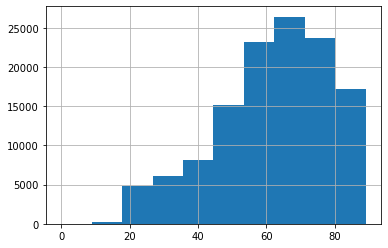

In [8]:
train.age.hist()

In [9]:
train.describe()

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
count,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,25328.000000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,25350.000000,25350.00000,124638.000000,124638.000000,11

In [10]:
-thangs to look at:
    -age where < 5 vs weight

SyntaxError: invalid syntax (<ipython-input-10-2da7ff03c44d>, line 1)

In [11]:
vars = train.columns.tolist()
vars

['encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp

In [12]:
round(train.isna().sum()/len(train)*100,2)

encounter_id                    0.00
hospital_id                     0.00
age                             3.83
bmi                             3.45
elective_surgery                0.00
ethnicity                       1.22
gender                          0.05
height                          1.60
hospital_admit_source          25.51
icu_admit_source                0.18
icu_id                          0.00
icu_stay_type                   0.00
icu_type                        0.00
pre_icu_los_days                0.00
readmission_status              0.00
weight                          2.66
albumin_apache                 60.05
apache_2_diagnosis              1.29
apache_3j_diagnosis             0.66
apache_post_operative           0.00
arf_apache                      0.00
bilirubin_apache               63.43
bun_apache                     19.52
creatinine_apache              19.12
fio2_apache                    76.62
gcs_eyes_apache                 1.68
gcs_motor_apache                1.68
g

In [16]:
#suffix=train.columns[train.startswith('h1')==True]
suffix= [col[3:] for col in train if col.startswith('h1')]

suffix

['diasbp_invasive_max',
 'diasbp_invasive_min',
 'diasbp_max',
 'diasbp_min',
 'diasbp_noninvasive_max',
 'diasbp_noninvasive_min',
 'heartrate_max',
 'heartrate_min',
 'mbp_invasive_max',
 'mbp_invasive_min',
 'mbp_max',
 'mbp_min',
 'mbp_noninvasive_max',
 'mbp_noninvasive_min',
 'resprate_max',
 'resprate_min',
 'spo2_max',
 'spo2_min',
 'sysbp_invasive_max',
 'sysbp_invasive_min',
 'sysbp_max',
 'sysbp_min',
 'sysbp_noninvasive_max',
 'sysbp_noninvasive_min',
 'temp_max',
 'temp_min',
 'albumin_max',
 'albumin_min',
 'bilirubin_max',
 'bilirubin_min',
 'bun_max',
 'bun_min',
 'calcium_max',
 'calcium_min',
 'creatinine_max',
 'creatinine_min',
 'glucose_max',
 'glucose_min',
 'hco3_max',
 'hco3_min',
 'hemaglobin_max',
 'hemaglobin_min',
 'hematocrit_max',
 'hematocrit_min',
 'inr_max',
 'inr_min',
 'lactate_max',
 'lactate_min',
 'platelets_max',
 'platelets_min',
 'potassium_max',
 'potassium_min',
 'sodium_max',
 'sodium_min',
 'wbc_max',
 'wbc_min',
 'arterial_pco2_max',
 'arte

In [24]:
h1_d1check=[]
for i in suffix:
    col1="h1_"+i 
    col2="d1_"+i 
    h1_d1=train[col1].equals(train[col2])
    h1_d1check.append(h1_d1)
    

In [25]:
h1_d1check

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [28]:
vars = {}
for i in suffix:
    vars[i] = train[train['h1_'+i] == train['d1_'+i]][['h1_'+i,'d1_'+i]]
    print(vars[i])

        h1_diasbp_invasive_max  d1_diasbp_invasive_max
3                         62.0                    62.0
6                        107.0                   107.0
...                        ...                     ...
130120                    70.0                    70.0
130128                    74.0                    74.0

[7072 rows x 2 columns]
        h1_diasbp_invasive_min  d1_diasbp_invasive_min
8                         52.0                    52.0
14                        46.0                    46.0
...                        ...                     ...
130136                    56.0                    56.0
130144                    41.0                    41.0

[5571 rows x 2 columns]
        h1_diasbp_max  d1_diasbp_max
0                68.0           68.0
2                88.0           88.0
...               ...            ...
130148           88.0           88.0
130152          102.0          102.0

[31486 rows x 2 columns]
        h1_diasbp_min  d1_diasbp_min
8    

        h1_creatinine_min  d1_creatinine_min
1                    0.56               0.56
6                    0.78               0.78
...                   ...                ...
130151               0.73               0.73
130156               1.06               1.06

[13466 rows x 2 columns]
        h1_glucose_max  d1_glucose_max
1                145.0           145.0
6                197.0           197.0
...                ...             ...
130151           182.0           182.0
130156           100.0           100.0

[22018 rows x 2 columns]
        h1_glucose_min  d1_glucose_min
9                134.0           134.0
18                88.0            88.0
...                ...             ...
130149            68.0            68.0
130156           100.0           100.0

[14808 rows x 2 columns]
        h1_hco3_max  d1_hco3_max
1              27.0         27.0
8              23.0         23.0
...             ...          ...
130151         20.0         20.0
130156         31.0

In [29]:
vitals = [((v.split("d1_")[1]).split("_min")[0]) for v in train_df.columns[train_df.columns.str.startswith('d1') & train_df.columns.str.endswith('min')]]

vitals_cols = []
vitals_cols_h1_min = []
vitals_cols_h1_max = []
vitals_cols_d1_min = []
vitals_cols_d1_max = []

for v in vitals:
    vitals_cols.append(v)
    vitals_cols_h1_min.append(f"h1_{v}_min")
    vitals_cols_h1_max.append(f"h1_{v}_max")
    vitals_cols_d1_min.append(f"d1_{v}_min")
    vitals_cols_d1_max.append(f"d1_{v}_max")

temp = pd.DataFrame({'vitals' : vitals_cols,
                    'h1_min' : train_df[vitals_cols_h1_min].isna().sum(axis=0).values,
                     'h1_max' : train_df[vitals_cols_h1_max].isna().sum(axis=0).values,
                     'd1_min' : train_df[vitals_cols_d1_min].isna().sum(axis=0).values,
                     'd1_max' : train_df[vitals_cols_d1_max].isna().sum(axis=0).values,
                    }).set_index('vitals')

temp

,h1_min,h1_max,d1_min,d1_max
vitals,,,,
diasbp_invasive,104829,104829,95068,95068
diasbp,5527,5527,277,277
...,...,...,...,...
arterial_po2,107445,107445,84010,84010
pao2fio2ratio,113397,113397,93339,93339


In [ ]:
drop_columns = train.columns[train.columns.str.startswith('h1') | train.columns.str.contains('invasive')]

train.drop(drop_columns, axis=1, inplace=True)
#test.drop(drop_columns, axis=1, inplace=True)

In [ ]:
train.albumin_apache.unique()

In [ ]:
#variables to exclude from analysis
-hospital_admit_source - 25% missing and no vital info
-

In [ ]:
variables with large % of missing values
-albumin_apache - 60%